In [1]:
import numpy as np 
from PIL import Image 
from glob import glob 
import matplotlib.pyplot as plt
from tqdm import tqdm 
directory="C:/Users/mattl/Pylon Video/823nm 100uW 20.4fps .05pss/*"
files= glob(directory) 
print(files.sort())

#file = files[1000]
steps= len(files)
print(steps)
Xmin = 0 
Xmax = steps/20.4*.05
X = np.linspace(Xmin,Xmax,steps)  
xalt = np.zeros(steps)
scansteps = 75
y = np.zeros(scansteps)
Z = np.zeros((steps,scansteps))
for i,file in enumerate(tqdm(files)):
#file = files [1]
    loc = int(file[107:-5])
    img = np.asarray(Image.open(file)).copy()
    for j in range(scansteps):
        size = 10
        xmin = 925+size*j-int(np.ceil(scansteps*size/2)) 
        xmax = xmin+size
        ymin = 500
        ymax = ymin+size
        Z[i,j] = np.mean(img[ymin:ymax,xmin:xmax])
        if(i==0):
            y[j] = xmin
            #print(xmin,xmax)
        #print(np.mean(img[ymin:ymax,xmin:xmax]))
    xalt[i]=loc/20.4*.05
        
    #img[ymin:ymax,xmin:xmax] = img[ymin:ymax,xmin:xmax]+np.max(img)/4
    #plt.imshow(img)
#plt.plot(X,Z)
#plt.plot(X,xalt)


None
1427


100%|██████████| 1427/1427 [01:00<00:00, 23.69it/s]


In [2]:
file[104:-5]

'1426'

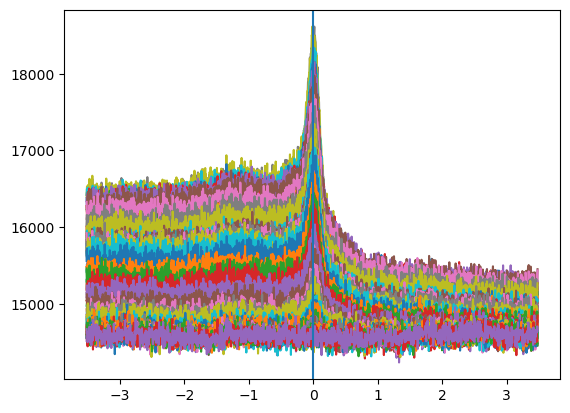

In [3]:
fig,ax =plt.subplots()
ax.plot(-X*2+3.48,Z)
ax.axvline(0)
#ax.imshow(img)
#plt.plot(X,xalt)

In [4]:
Z[1,2]

14887.04

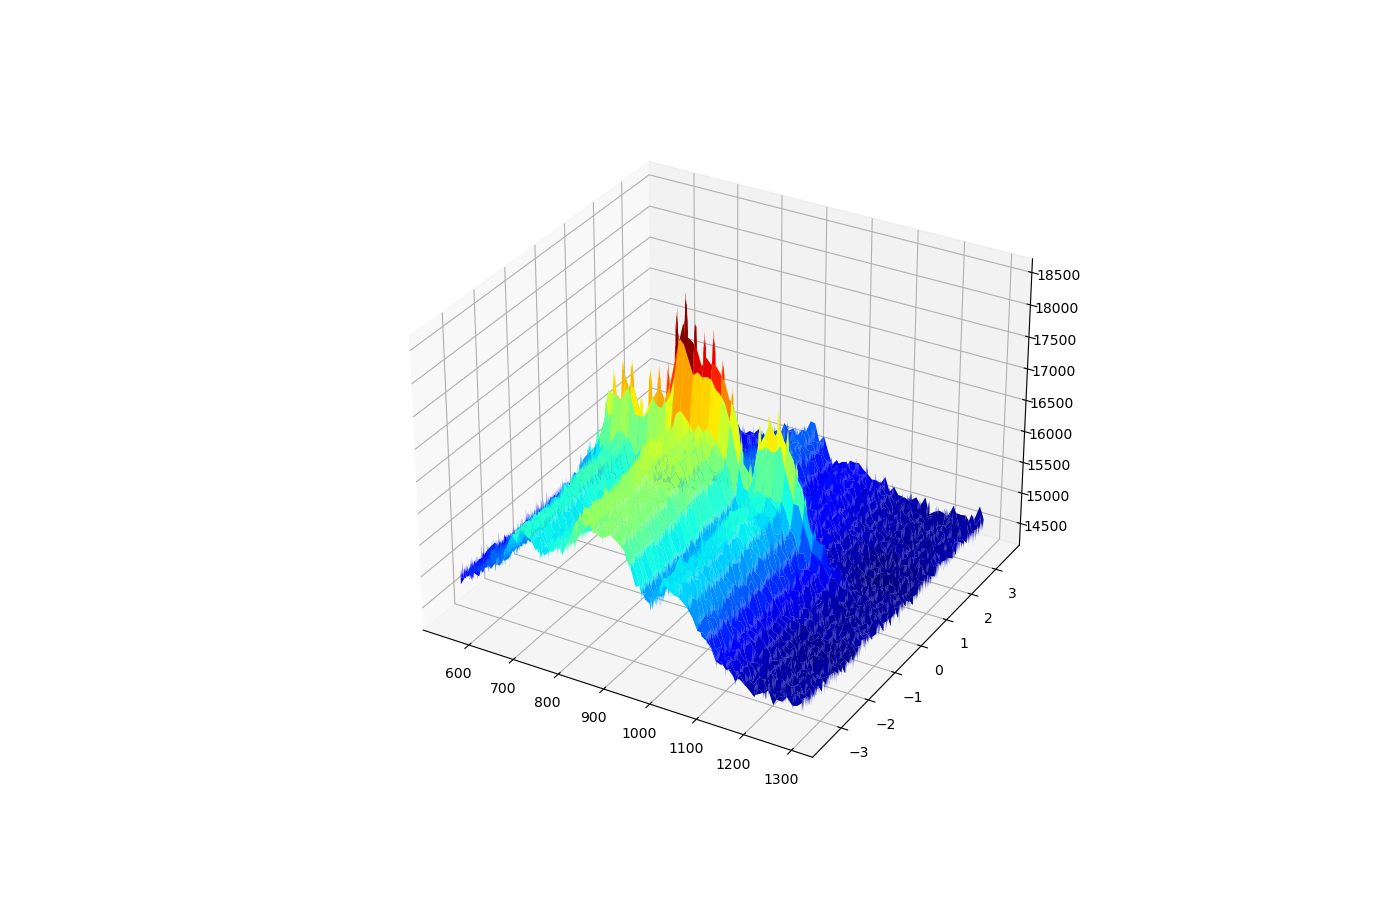

In [5]:

%matplotlib widget
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
XX,YY = np.meshgrid(y,-X*2+3.48) 

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(XX, YY, Z,cmap= 'jet')
 
# show plot
plt.show()

np.savetxt('yvals.csv',y,delimiter=';')
np.savetxt('xvals.csv',-X*2+3.48,delimiter=';')
np.savetxt('Zmap.csv',Z,delimiter=';')


In [6]:
print('done')

done
